In [1]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('patientprofile.csv')

In [4]:
data.head()

,patient_id,name,gender,age,race,side_effects
0,48683,Justin Hopkins,female,10-20,Hispanic,No Side Effects
1,101343,Heather Murphy,male,40-50,Asian,Mild Side Effects
2,66360,Michael Burns,female,50-60,White,Extremely Severe Side Effects
3,244456,Amy Elliott,female,50-60,White,Moderate Side Effects
4,7720,Alexander Johnson,male,20-30,Black,Moderate Side Effects


In [5]:
data.shape

(400000, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   patient_id    400000 non-null  int64 
 1   name          400000 non-null  object
 2   gender        400000 non-null  object
 3   age           400000 non-null  object
 4   race          400000 non-null  object
 5   side_effects  400000 non-null  object
dtypes: int64(1), object(5)
memory usage: 18.3+ MB


In [7]:
data['age'].value_counts()

70-80     76284
30-40     71743
50-60     63967
90-100    35914
0-10      32124
20-30     28305
80-90     27994
60-70     23966
10-20     19853
40-50     19850
Name: age, dtype: int64

In [8]:
data['gender'].value_counts()

female    279717
male      120283
Name: gender, dtype: int64

In [9]:
# The correlation between craeted features is low, so mapping is done for improving accuracy

In [10]:
data.loc[data['age'] == '0-10', 'age_score'] = '6'  
data.loc[data['age'] == '10-20', 'age_score'] = '2' 
data.loc[data['age'] == '20-30', 'age_score'] = '5'  
data.loc[data['age'] == '30-40', 'age_score'] = '9'  
data.loc[data['age'] == '40-50', 'age_score'] = '1' 
data.loc[data['age'] == '50-60', 'age_score'] = '8'  
data.loc[data['age'] == '60-70', 'age_score'] = '3'  
data.loc[data['age'] == '70-80', 'age_score'] = '10' 
data.loc[data['age'] == '80-90', 'age_score'] = '4'  
data.loc[data['age'] == '90-100', 'age_score'] = '7'  

In [11]:
data.loc[data['side_effects'] == 'Moderate Side Effects', 'sideeffects_score'] = '5'  
data.loc[data['side_effects'] == 'Severe Side Effects', 'sideeffects_score'] = '4' 
data.loc[data['side_effects'] == 'Mild Side Effects', 'sideeffects_score'] = '3'  
data.loc[data['side_effects'] == 'Extremely Severe Side Effects', 'sideeffects_score'] = '2'  
data.loc[data['side_effects'] == 'No Side Effects', 'sideeffects_score'] = '1' 

In [12]:
data.loc[data['race'] == 'White', 'race_score'] = '4'  
data.loc[data['race'] == 'Hispanic', 'race_score'] = '3' 
data.loc[data['race'] == 'Black', 'race_score'] = '2'  
data.loc[data['race'] == 'Asian', 'race_score'] = '1'  


In [13]:
data.loc[data['gender'] == 'male', 'gender_score'] = '4'  
data.loc[data['gender'] == 'female', 'gender_score'] = '6' 


In [14]:
data = data.astype({'age_score': 'int','race_score': 'int','sideeffects_score': 'int','gender_score': 'int'})

In [15]:
data['score']=data['age_score']+data['race_score']+data['sideeffects_score']+data['gender_score']

In [16]:
data['ranking']=data['score']/2

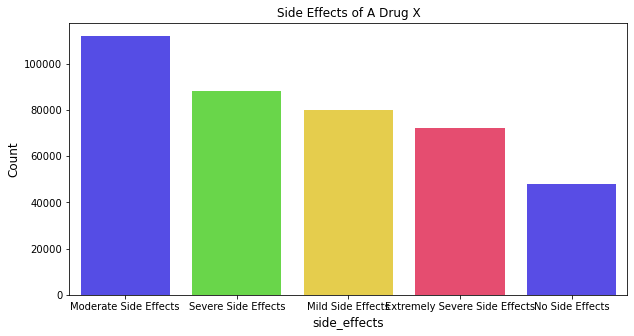

In [17]:
count = data['side_effects'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('side_effects', fontsize=12)
plt.title('Side Effects of A Drug X')
plt.show()

[128541, 111821, 87410, 72228]


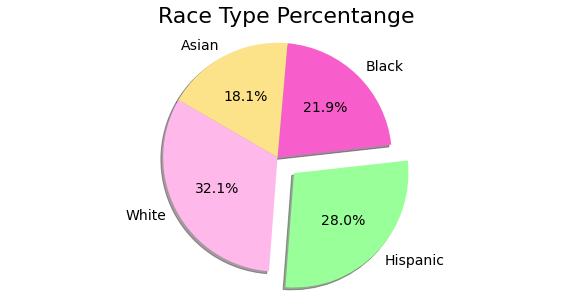

In [18]:
# Race types and its values Single Pie chart
populations = data['race'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'White','Hispanic','Black','Asian'
colors = ['#FEB8EA','#99ff99','#F75ECB','#FCE38A']
explode = (0, 0.2,0,0)  # explode 1st slice
fig = plt.figure(figsize=(10,5))
# Plot
plt.title('Race Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [19]:
fe=data.groupby('race').size()/len(data)
data.loc[:, 'race_fe']=data['race'].map(fe)

In [21]:
fe=data.groupby('gender').size()/len(data)
data.loc[:, 'gender_fe']=data['gender'].map(fe)

In [22]:
fe=data.groupby('age').size()/len(data)
data.loc[:, 'age_fe']=data['age'].map(fe)

In [23]:
data=data.drop(['patient_id','race','gender','age'],axis=1)
data.head()

,name,side_effects,age_score,sideeffects_score,race_score,gender_score,score,ranking,race_fe,gender_fe,age_fe
0,Justin Hopkins,No Side Effects,2,1,3,6,12,6.0,0.279552,0.699292,0.049633
1,Heather Murphy,Mild Side Effects,1,3,1,4,9,4.5,0.180570,0.300708,0.049625
2,Michael Burns,Extremely Severe Side Effects,8,2,4,6,20,10.0,0.321352,0.699292,0.159917
3,Amy Elliott,Moderate Side Effects,8,5,4,6,23,11.5,0.321352,0.699292,0.159917
4,Alexander Johnson,Moderate Side Effects,5,5,2,4,16,8.0,0.218525,0.300708,0.070763


In [24]:
data=data.drop(['name','age_score','race_score','sideeffects_score','gender_score', 'score'],axis=1)
data.head()

,side_effects,ranking,race_fe,gender_fe,age_fe
0,No Side Effects,6.0,0.279552,0.699292,0.049633
1,Mild Side Effects,4.5,0.180570,0.300708,0.049625
2,Extremely Severe Side Effects,10.0,0.321352,0.699292,0.159917
3,Moderate Side Effects,11.5,0.321352,0.699292,0.159917
4,Moderate Side Effects,8.0,0.218525,0.300708,0.070763


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data["side_effects"])
data["side_effects"]=encoder.transform(data["side_effects"])
print(data["side_effects"])

0         3
1         1
2         0
3         2
4         2
         ..
399995    0
399996    3
399997    3
399998    2
399999    0
Name: side_effects, Length: 400000, dtype: int32


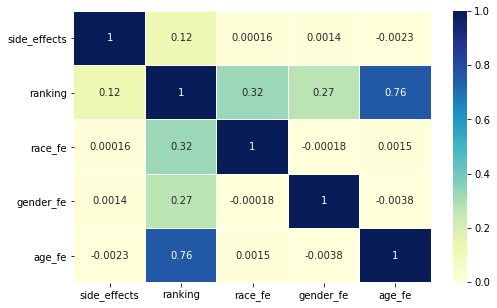

In [26]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [27]:
x=data.drop('side_effects',axis=1)
y=data['side_effects'] 
x.head()

,ranking,race_fe,gender_fe,age_fe
0,6.0,0.279552,0.699292,0.049633
1,4.5,0.180570,0.300708,0.049625
2,10.0,0.321352,0.699292,0.159917
3,11.5,0.321352,0.699292,0.159917
4,8.0,0.218525,0.300708,0.070763


In [28]:
x.dtypes

ranking      float64
race_fe      float64
gender_fe    float64
age_fe       float64
dtype: object

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [30]:
x.shape

(400000, 4)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score


In [33]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_predlr = logit_model.predict(x_test)

In [34]:
print(accuracy_score(y_test,y_predlr))

0.6113357142857143


In [52]:
print('Weighted f1 score:{:.2f}'.format(f1_score(y_test,y_predlr,average='weighted')))

Weighted f1 score:0.60


In [49]:
confusion_matrix(y_test,y_predlr)

array([[15731,  3927,     0,  2441,  3153],
       [ 2633, 15062,  3654,   884,  5633],
       [    0,  2054, 33947,     0,  3430],
       [ 9830,  2734,     0,  4116,     0],
       [ 1392,  3170,  9260,   218, 16731]], dtype=int64)

In [35]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_preddt=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_preddt))

1.0


In [36]:
y_pred=clf.predict(x_test)
print(y_test, y_preddt)

23218     4
20731     1
39555     4
147506    2
314215    2
         ..
362985    0
124599    1
291845    3
365050    3
138199    1
Name: side_effects, Length: 140000, dtype: int32 [4 1 4 ... 3 3 1]


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train.values.ravel())
y_predrf=rf.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))

Accuracy: 1.0


In [39]:
accuracy_score(y_test,y_predrf)

1.0

In [40]:
#Feature Importance in Random Forest

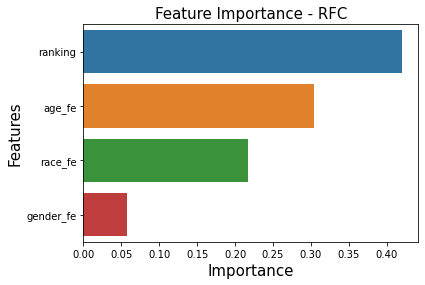

In [41]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features[0:20])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance - RFC', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [42]:
# Hyperparameter tuning of random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfh = RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1500, n_jobs=1,
                      random_state=42)
rfh.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1500, n_jobs=1,
                       random_state=42)

In [47]:
y_predrfh=rfh.predict(x_test)

In [48]:
accuracy_score(y_test,y_predrfh)

0.5976214285714285

In [50]:
confusion_matrix(y_test,y_predrfh)

array([[13044,  6239,  1089,  3786,  1094],
       [ 5080, 14733,  4021,   590,  3442],
       [  474,  2675, 35068,     0,  1214],
       [ 5194,   495,   163, 10601,   227],
       [ 1733,  7602, 11143,    72, 10221]], dtype=int64)

In [51]:
print('Weighted f1 score:{:.2f}'.format(f1_score(y_test,y_predrfh,average='weighted')))

Weighted f1 score:0.58
